In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = plt.imread("./8.tif")
img = img.astype('float32') / 255.
mask = plt.imread("./8_gt.png")
mask = np.sum(mask, -1) / 3
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: './8_gt.png'

In [57]:
n, m = mask.shape
indexTamp = []
for i in range(n):
    for j in range(m):
        if mask[i, j] == 1:
            indexTamp.append((i, j))

In [58]:
noisy = np.copy(img)
mu, sigma = 0, 0.05
for i, j in indexTamp:
    noise = np.random.normal(mu, sigma, 3)
    noisy[i, j,:] += noise
    for ch in range(3):
        if noisy[i, j, ch] < 0:
            noisy[i, j, ch] = 0
        elif noisy[i, j, ch] > 1:
            noisy[i, j, ch] = 1

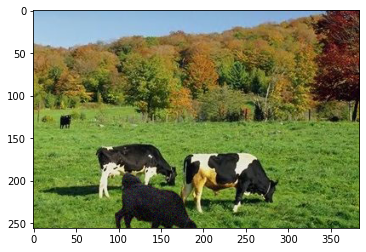

In [59]:
plt.imshow(noisy)

In [60]:
plt.imsave("./11.jpg", noisy, format='jpg')